# Population growth in Israel project

In this project, we tried to predict the population growth between 2017 and 2018 and to analyze factors that affect population growth.

Israel's population is growing rapidly from year to year, and it is an important topic in the Israeli discourse.

In order to research data and to build a model which predicts the population growth, we scraped data from the Central Bureau of Statistics (CBS) website:

https://boardsgenerator.cbs.gov.il/pages/webparts/yishuvimpage.aspx

This site contains a dynamic table with data of some categories like population, salary, construction data, etc of settlements in Israel.

To scrape the data, we used Selenium library in order to navigate between the categories. Some data was unrelevant for our purpose, so we chose specific categories which we thought could affect population growth.

Categories we chose: General data, Transportation, Population, social-economic index data.

Because each category table is arranged differently in terms of localities, we created for each category a different csv. file. Then we combined all of them into one dataframe.

First, we imported the relevant libraries for use:

In [1]:
import pandas as pd
import numpy as np
import bidi
from bidi.algorithm import get_display 
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.rcParams["font.family"] = "David"
mpl.use('Agg')
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

Then, we loaded all the csv files:

In [2]:
general_data_2017 = pd.read_csv("C:/Users/nirts/OneDrive/שולחן העבודה/General.csv", encoding='utf-8')
transportation_data = pd.read_csv("C:/Users/nirts/OneDrive/שולחן העבודה/Transportation.csv", encoding='utf-8')
population_data_from_2014 = pd.read_csv("C:/Users/nirts/OneDrive/שולחן העבודה/population2014.csv", encoding='utf-8')
population_data_from_2015 = pd.read_csv("C:/Users/nirts/OneDrive/שולחן העבודה/population2015.csv", encoding='utf-8')
population_data_from_2016 = pd.read_csv("C:/Users/nirts/OneDrive/שולחן העבודה/population2016.csv", encoding='utf-8')
population_data_from_2017 = pd.read_csv("C:/Users/nirts/OneDrive/שולחן העבודה/population2017.csv", encoding='utf-8')
population_data_from_2018 = pd.read_csv("C:/Users/nirts/OneDrive/שולחן העבודה/population2018.csv", encoding='utf-8')
social_economic_index_data = pd.read_csv("C:/Users/nirts/OneDrive/שולחן העבודה/SE.csv", encoding='utf-8')

In [3]:
dfs = [general_data_2017, transportation_data, population_data_from_2014, population_data_from_2015, population_data_from_2016,
       population_data_from_2017, population_data_from_2018, social_economic_index_data]

sum([df.shape[0] * df.shape[1] for df in dfs])   

69819

Created columns which divides the population data to 2014-2018:

In [4]:
population_data_from_2014['סה"כ 2014'] = population_data_from_2014['סה"כ']
population_data_from_2014['זכר 2014'] = population_data_from_2014['זכר']
population_data_from_2014['נקבה 2014'] = population_data_from_2014['נקבה']
population_data_from_2014 = population_data_from_2014.drop(columns=['סה"כ', 'זכר', 'נקבה'])

In [5]:
population_data_from_2015['סה"כ 2015'] = population_data_from_2015['סה"כ']
population_data_from_2015['זכר 2015'] = population_data_from_2015['זכר']
population_data_from_2015['נקבה 2015'] = population_data_from_2015['נקבה']
population_data_from_2015 = population_data_from_2015.drop(columns=['סה"כ', 'זכר', 'נקבה'])

In [6]:
population_data_from_2016['סה"כ 2016'] = population_data_from_2016['סה"כ']
population_data_from_2016['זכר 2016'] = population_data_from_2016['זכר']
population_data_from_2016['נקבה 2016'] = population_data_from_2016['נקבה']
population_data_from_2016 = population_data_from_2016.drop(columns=['סה"כ', 'זכר', 'נקבה'])

In [7]:
population_data_from_2017['סה"כ 2017'] = population_data_from_2017['סה"כ']
population_data_from_2017['זכר 2017'] = population_data_from_2017['זכר']
population_data_from_2017['נקבה 2017'] = population_data_from_2017['נקבה']
population_data_from_2017 = population_data_from_2017.drop(columns=['סה"כ', 'זכר', 'נקבה'])

In [8]:
population_data_from_2018['סה"כ 2018'] = population_data_from_2018['סה"כ']
population_data_from_2018['זכר 2018'] = population_data_from_2018['זכר']
population_data_from_2018['נקבה 2018'] = population_data_from_2018['נקבה']
population_data_from_2018 = population_data_from_2018.drop(columns=['סה"כ', 'זכר', 'נקבה'])

In [9]:
#We merged all the dataframes into one using merge method.
#Because pandas can't merge dataframes with different datatypes (like int and object), we had to convert all the dataframes
#to object type. Then we converted back the relevant serieses back to numeric values.

final = pd.merge(general_data_2017, transportation_data, how='inner', on='שם יישוב')
#final['סמל היישוב'] = final['סמל היישוב'].astype(object)
final['אשכול רשויות מקומיות'] = final['אשכול רשויות מקומיות'].astype(object)
final['סך הכל'] = final['סך הכל'].astype(object)
final = pd.merge(final, population_data_from_2017, how='inner', on='שם יישוב')
final = pd.merge(final, population_data_from_2018, how='inner', on='שם יישוב')
final = pd.merge(final, population_data_from_2016, how='inner', on='שם יישוב')
final = pd.merge(final, population_data_from_2015, how='inner', on='שם יישוב')
final = pd.merge(final, population_data_from_2014, how='inner', on='שם יישוב')
for column in social_economic_index_data.columns:
    social_economic_index_data[column] = social_economic_index_data[column].astype(object)
final = pd.merge(final, social_economic_index_data, how='inner', on='שם יישוב')
final = final.drop(columns=['סמל היישוב_x', 'סמל היישוב_y', 'זכר 2018', 'נקבה 2018', 'זכר 2017', 'נקבה 2017', 'זכר 2016', 'נקבה 2016'
                            ,'זכר 2015', 'נקבה 2015', 'זכר 2014', 'נקבה 2014', 'משאית עד 4.0 טון עד 2008 משאית עד 3.5 טון החל ב- 2009', 
                            'משאית מ - 4.1 עד 15.9 טון עד 2008 משאית מ - 3.6 עד 12.0 טון החל ב- 2009', 'סך הכל',
                            'משאית + 16.0 טון עד 2008 משאית + 12.1 טון החל ב- 2009', 'אוטובוס זעיר קיים מ - 1993', 'אוכלוסייה - סך הכל','אשכול רשויות מקומיות'])

#Most of the values which represent numbers were object type values (they had seperated comma
#between thousand and hundred number representations, so we had to convert them to numeric values to remove the commas). 

columns_to_convert = [
       'רכב פרטי', 
       'משאית סך הכל',
       'אוטובוס',
       'מונית', 'אופנוע', 'רכב מיוחד',
       'סה"כ 2017', 'סה"כ 2018',
       'אוכלוסיית המדד 2017' , 'צורת יישוב_y', 'סה"כ 2014', 'סה"כ 2015', 'סה"כ 2016' 
]
 
for column in columns_to_convert:
    final[column] = final[column].apply(lambda x: 0 if x == '-' else x)
    final[column].fillna(0, inplace=True)
    final[column] = pd.to_numeric(final[column].str.replace(',',''))
    final[column].fillna(0, inplace=True)
    
#Dropping all form of settlements that is defined as work places & dropping some unknown columns
final = final[(final['צורת יישוב_x'] != "מוקד תעסוקה") & (final['צורת יישוב_x'] != "מקום")]
final = final.drop(columns = 'צורת יישוב_y')

#More conversions of columns:

final['מזה: ערבים'] = final['מזה: ערבים'].apply(lambda x: 0 if x == '-' else x)
final['מזה: יהודים'] = final['מזה: יהודים'].apply(lambda x: 0 if x == '-' else x)
final['מזה: יהודים ואחרים'] = final['מזה: יהודים ואחרים'].apply(lambda x: 0 if x == '-' else x)
final['מזה: ערבים'] = pd.to_numeric(final['מזה: ערבים'].str.replace(',',''))
final['מזה: ערבים'].fillna(0, inplace=True)
final['מזה: יהודים'] = pd.to_numeric(final['מזה: יהודים'].str.replace(',',''))
final['מזה: יהודים'].fillna(0, inplace=True)
final['מזה: יהודים ואחרים'] = pd.to_numeric(final['מזה: יהודים ואחרים'].str.replace(',',''))
final['מזה: יהודים ואחרים'].fillna(0, inplace=True)
final['ערך מדד 2017'] = pd.to_numeric(final['ערך מדד 2017'])

#Some data has negative values, so we dropped all the rows which include negative values
final = final[final["מזה: ערבים"] >= 0]

C:\Users\nirts\AppData\Local\Temp\ipykernel_7672\1249752964.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'סמל היישוב_x'} in the result is deprecated and will raise a MergeError in a future version.
  final = pd.merge(final, population_data_from_2018, how='inner', on='שם יישוב')
C:\Users\nirts\AppData\Local\Temp\ipykernel_7672\1249752964.py:12: FutureWarning: Passing 'suffixes' which cause duplicate columns {'סמל היישוב_x'} in the result is deprecated and will raise a MergeError in a future version.
  final = pd.merge(final, population_data_from_2015, how='inner', on='שם יישוב')
C:\Users\nirts\AppData\Local\Temp\ipykernel_7672\1249752964.py:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'סמל היישוב_x'} in the result is deprecated and will raise a MergeError in a future version.
  final = pd.merge(final, social_economic_index_data, how='inner', on='שם יישוב')


Translated some of the information from Hebrew to English so it will be easy to work with:

In [10]:
columns_to_english = ['Buses', 'Population index 2017', 'Bikes', 'Natural area', 'Cluster 2017', 'Rank 2017',
           'Taxi', 'Jewish', 'Jewish and other', 'Arabs', 'District', 'Municipal status', 'Trucks', 'Subdistrict',
           'Total Population 2014', 'Total Population 2015', 'Total Population 2016', 'Total Population 2017', 
           'Total Population 2018', 'Index value', 'Village form', 'Special vehicle', 'Private vehicle', 'Name']

village_form_to_english = { 'יישובים יהודיים 19999-10000 תושבים' : 'Jewish village 10000-19999',
                            'יישובים יהודיים 199999-100000 תושבים' : 'Jewish village 100000-199999',
                            'יישובים יהודיים 4999-2000 תושבים' : 'Jewish village 2000-4999',
                            'יישובים יהודיים 49999-20000 תושבים' : 'Jewish village 20000-49999',
                            'יישובים יהודיים 499999-200000 תושבים' : 'Jewish village 20000-499999',
                            'יישובים יהודיים 500000 תושבים ומעלה' : 'Jewish village 500000 plus',
                            'יישובים יהודיים 9999-5000 תושבים' : 'Jewish village 5000-9999',
                            'יישובים יהודיים 99999-50000 תושבים' : 'Jewish village 50000-99999',
                            'יישובים כפריים אחרים יהודיים' : 'Other Jewish villages',
                            'יישובים כפריים אחרים לא יהודיים' : 'Other non-Jewish villages',
                            'יישובים לא יהודיים 19999-10000 תושבים' : 'Non-Jewish village 10000-19999',
                            'יישובים לא יהודיים 4999-2000 תושבים' : 'Non-Jewish village 2000-4999',
                            'יישובים לא יהודיים 49999-20000 תושבים' : 'Non-Jewish village 20000-49999',
                            'יישובים לא יהודיים 9999-5000 תושבים' : 'Non-Jewish village 5000-9999',
                            'יישובים לא יהודיים 99999-50000 תושבים' : 'Non-Jewish village 50000-99999',
                            'יישובים מוסדיים יהודיים' : 'Jewish institutional village',
                            'יישובים קהילתיים' : 'Community village',
                            'מושבים - לרבות כפרים שיתופיים' : 'Moshav - cooperative village',
                            'מושבים 4999-2000 תושבים' : 'Moshav 2000-4999',
                            'מושבים שיתופיים' : 'Other',
                            'מושבים שיתופיים 4999-2000 תושבים' : 'Other_2 2000-4999',
                            'קיבוצים' : 'Kibbutz',
                            'קיבוצים 4999-2000 תושבים' : 'Kibbutz 2000-4999'}



for i, col in enumerate(sorted(final.columns)):
    final[columns_to_english[i]] = final[col]
    final = final.drop(columns=col)
    
final['Village form'].replace(village_form_to_english, inplace=True)

In [11]:
districts_to_english = {'ירושלים' : 'Jerusalem',
                        'הצפון' : 'North',
                        'הדרום' : 'South',
                        'חיפה' : 'Haifa',
                        'המרכז' : 'Center',
                        'יהודה והשומרון' : 'Judea and Sumaria',
                        'תל אביב' : 'Tel Aviv'}


final['District'].replace(districts_to_english, inplace=True)

In [12]:
natural_areas_to_english = {'אזור חיפה' : 'Haifa',
                            'אזור באר שבע' : 'Beer Sheva',
                            'אזור נהרייה' : 'Naharia',
                            'אזור מלאכי' : 'Malachi',
                            'גליל עליון מזרחי' : 'East Upper Galilee',
                            'אזור חדרה' : 'Hadera',
                            'אזור שפרעם' : 'Shfaram',
                            'אזור אילון' : 'Ayalon',
                            'שפלת יהודה' : 'Shfelat Yehuda',
                            'עמק יזרעאל' : 'Jezreel Valley',
                            'מערב השרון' : 'Hasharon West',
                            'גולן דרומי' : 'Golan Heights South',
                            'אזור לכיש' : 'Lachish',
                            'גולן צפוני' : 'Golan Heights North',
                            'אזור בשור' : 'Bashur area',
                            'אזור רמת גן' : 'Ramat Gan',
                            'אזור אשקלון' : 'Ashkelon',
                            'מזרח השרון' : 'Hasharon East',
                            'הר אלכסנדר' : 'Mount Alexander',
                            'עמק חולה' : 'Emek Hula',
                            'דרום השרון' : 'Hasharon South',
                            'אזור רמלה' : 'Ramla',
                            'אזור עכו' : 'Acre',
                            'אזור חולון' : 'Holon',
                            'הרי נצרת-תירען' : 'Nazereth-Tiran Mounts',
                            'אזור ראשון לציון' : 'Rishon Lezion',
                            'גליל תחתון מזרחי' : 'East Lower Galilee',
                            'הערבה' : 'Haarava',
                            'אזור פתח תקווה' : 'Petach Tikva',
                            'רמת מנשה' : 'Ramat Menashe',
                            'אזור חצור' : 'Hatzor',
                            'אזור יקנעם' : 'Yakneam',
                            'כנרות' : 'Keenarot',
                            'הר הנגב הצפוני' : 'Mount Negev North',
                            'אזור אשדוד' : 'Ashdod',
                            'אזור גרר' : 'Gerar',
                            'גולן תיכוני' : 'Golan Tichoni',
                            'אזור יחיעם' : 'Yechiam',
                            'עמק חרוד' : 'Harod Valley',
                            'אזור רחובות' : 'Rehovot',
                            'אזור זכרון יעקב' : 'Zichron Yaakov',
                            'רמת כוכב' : 'Ramat Kochav',
                            'אזור כרמיאל' : 'Carmiel',
                            'חוף הכרמל' : 'Hof HaCarmel',
                            'עמק בית שאן' : 'Beit Shean Valley',
                            'אזור ים המלח' : 'Dead Sea',
                            'אזור החרמון' : 'The Hermon',
                            'אזור מודיעין' : 'Modiin',
                            'אזור תל אביב' : 'Tel Aviv',
                            'הר הנגב הדרומי' : 'Mount Negev North',
                            'הרי יהודה' : 'Yehuda Mountains'}

final['Natural area'].replace(natural_areas_to_english, inplace=True)

In [13]:
#The final dataframe:
final

,Buses,Population index 2017,Bikes,Natural area,Cluster 2017,Rank 2017,Taxi,Jewish,Jewish and other,Arabs,...,Total Population 2014,Total Population 2015,Total Population 2016,Total Population 2017,Total Population 2018,Index value,Village form,Special vehicle,Private vehicle,Name
0,4.0,7248,66.0,Yehuda Mountains,3,65,12.0,64.0,84.0,7248.0,...,6795,6978,7140,7332,7543,-0.783,Non-Jewish village 5000-9999,0.0,1880.0,אבו גוש
1,0.0,13694,104.0,Naharia,3,63,34.0,11.0,28.0,13667.0,...,13151,13358,13518,13694,13915,-0.792,Non-Jewish village 10000-19999,3.0,4137.0,אבו סנאן
2,0.0,1569,2.0,Beer Sheva,1,14,0.0,0.0,0.0,1569.0,...,1150,1218,1440,1569,1815,-2.031,Other non-Jewish villages,0.0,78.0,אבו קורינאת (יישוב)
3,3.0,2759,16.0,Haifa,2,36,12.0,1.0,1.0,2758.0,...,2672,2689,2748,2759,2773,-1.360,Non-Jewish village 2000-4999,0.0,746.0,אבטין
4,0.0,436,6.0,Shfaram,8,708,0.0,418.0,436.0,0.0,...,185,381,394,436,470,1.099,Community village,0.0,150.0,אבטליון
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,1.0,2236,10.0,Bashur area,1,18,1.0,2232.0,2235.0,0.0,...,2088,2156,2235,2236,2164,-1.903,Moshav 2000-4999,0.0,210.0,תפרח
1179,0.0,677,4.0,Gerar,8,751,0.0,677.0,677.0,0.0,...,583,649,666,677,700,1.202,Moshav - cooperative village,0.0,260.0,תקומה
1180,0.0,3750,25.0,NaN,5,261,1.0,3711.0,3749.0,1.0,...,3200,3495,3633,3750,3882,0.157,Jewish village 2000-4999,0.0,948.0,תקוע
1181,0.0,565,0.0,Beer Sheva,1,3,0.0,6.0,6.0,559.0,...,428,437,485,565,1089,-3.062,Other non-Jewish villages,0.0,63.0,תרבין א-צאנע (יישוב)*


A correlation table between continuous features. As you can see, the majority of the features are correlated: 

<AxesSubplot:>

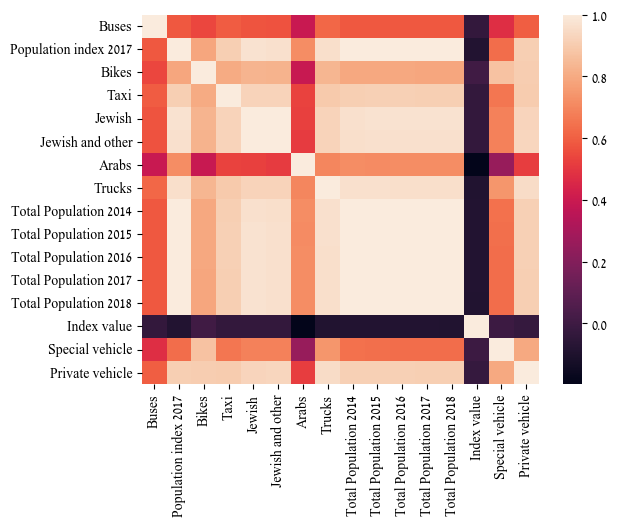

In [14]:
sns.heatmap(final.corr())

In [15]:
final['Difference 2014-2015'] = final['Total Population 2015'] - final['Total Population 2014']
final['Difference 2015-2016'] = final['Total Population 2016'] - final['Total Population 2015']
final['Difference 2016-2017'] = final['Total Population 2017'] - final['Total Population 2016']
final['Difference 2017-2018'] = final['Total Population 2018'] - final['Total Population 2017']




# EDA and Visualization:



Population in 2014:  7818617
Population in 2015:  8356432
Population in 2016:  8518906
Population in 2017:  8684323
Population in 2018:  8854685


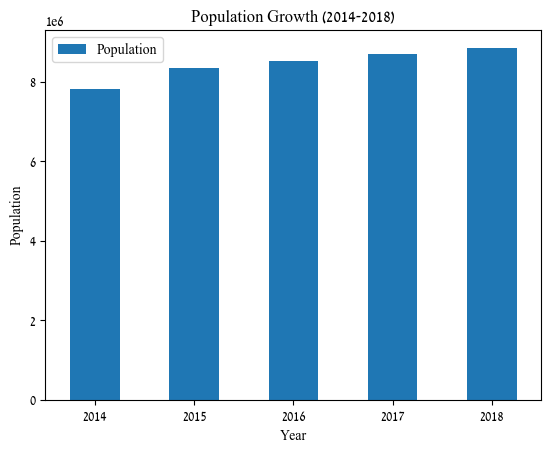

In [16]:
data_for_comparison = pd.DataFrame({'Year': [2014, 2015, 2016, 2017, 2018], 
                                    'Population': [final['Total Population 2014'].sum(), final['Total Population 2015'].sum(),
                                    final['Total Population 2016'].sum(), final['Total Population 2017'].sum(), 
                                                   final['Total Population 2018'].sum()]})
data_for_comparison = data_for_comparison.set_index('Year')
print("Population in 2014: ", final['Total Population 2014'].sum())
print("Population in 2015: ", final['Total Population 2015'].sum())
print("Population in 2016: ", final['Total Population 2016'].sum())
print("Population in 2017: ", final['Total Population 2017'].sum())
print("Population in 2018: ", final['Total Population 2018'].sum())
d = data_for_comparison.plot(kind='bar', rot=0)
d.set_title('Population Growth (2014-2018)')
d.set_xlabel('Year')
d.set_ylabel('Population')
plt.show()

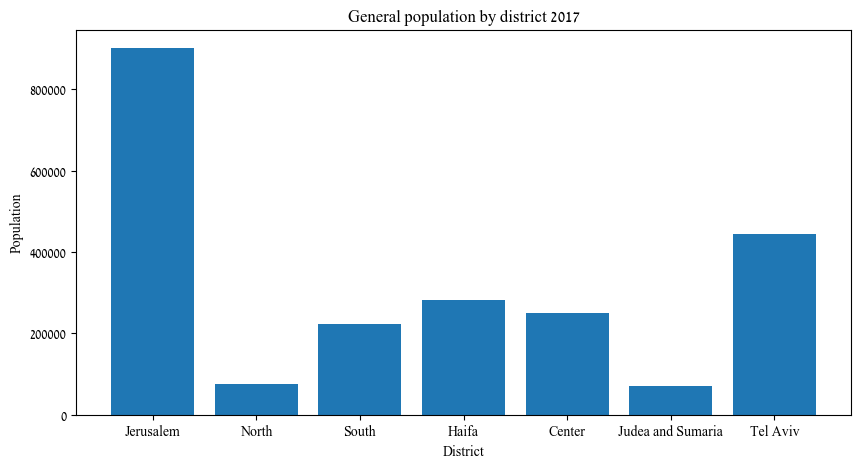

In [17]:
fig = plt.figure(figsize=(10, 5))
plt.bar(final['District'], final['Total Population 2017'])
plt.title('General population by district 2017')
plt.xlabel('District')
plt.ylabel('Population')
plt.show()

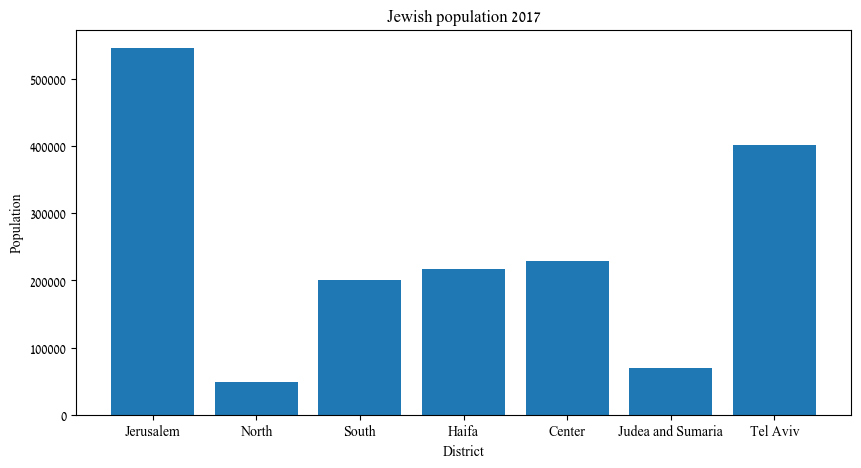

In [18]:
fig = plt.figure(figsize=(10, 5))
plt.bar(final['District'], final['Jewish'])
plt.title('Jewish population 2017')
plt.xlabel('District')
plt.ylabel('Population')
plt.show()

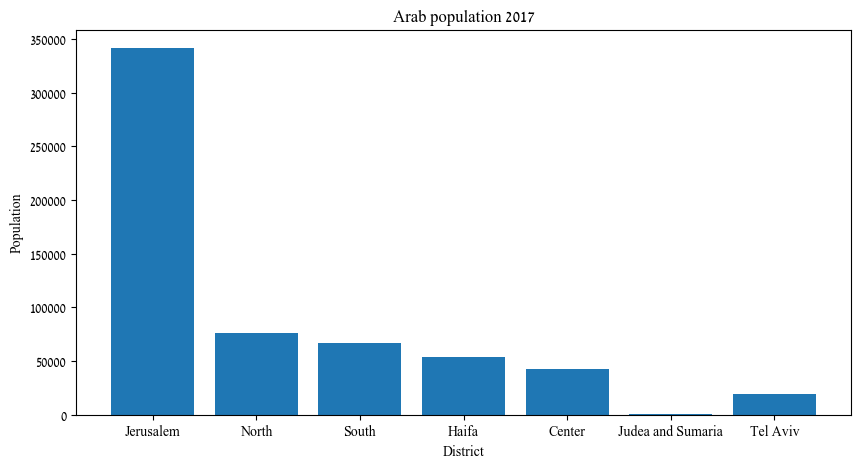

In [19]:
fig = plt.figure(figsize=(10, 5))
plt.bar(final['District'], final['Arabs'])
plt.title('Arab population 2017')
plt.xlabel('District')
plt.ylabel('Population')
plt.show()

Population growth percentage in the big cities of Israel (table and graph):

In [20]:
population_cols = sorted(final.columns)[21:26]
population_cols.append('Name')
biggest_cities = final.sort_values(by='Total Population 2017', ascending=False).head(20).copy()
biggest_cities = biggest_cities.loc[:, population_cols].set_index('Name').head(10)
biggest_cities = biggest_cities.reindex(sorted(biggest_cities.columns), axis=1)
biggest_cities.T.pct_change()

Name,ירושלים,תל אביב -יפו,חיפה,ראשון לציון,פתח תקווה,אשדוד,נתניה,באר שבע,בני ברק,חולון
Total Population 2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Population 2015,0.018757,0.015849,0.006572,0.013741,0.024974,0.010162,0.027259,0.012522,0.025302,0.008222
Total Population 2016,0.019557,0.013689,0.002467,0.013731,0.022447,0.006436,0.013888,0.010835,0.033726,0.010612
Total Population 2017,0.021130,0.011670,0.005351,0.010258,0.017733,0.005831,0.015496,0.008459,0.025455,0.009359
Total Population 2018,0.020122,0.017081,0.009083,0.007444,0.016301,0.007834,0.014675,0.006991,0.026263,0.008561


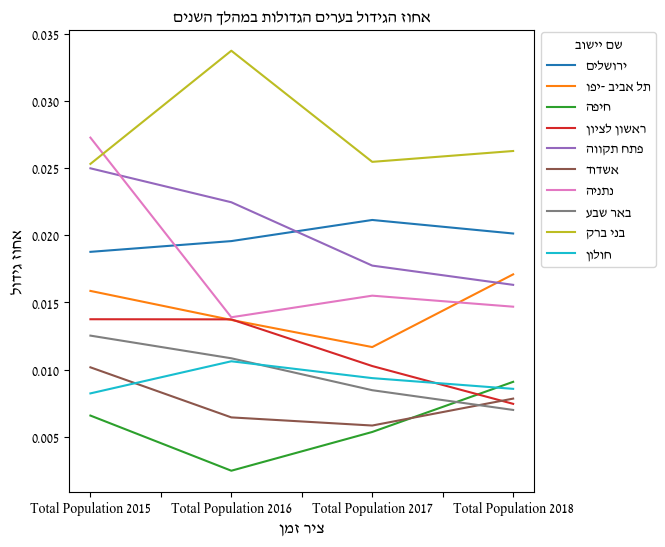

In [21]:
biggest_cities = biggest_cities.T.pct_change().T
cities_legend = [get_display(city) for city in biggest_cities.T.columns]
ax = biggest_cities.T.plot(figsize=(6, 6))
ax.set_title(get_display('אחוז הגידול בערים הגדולות במהלך השנים'))
ax.set_ylabel(get_display('אחוז גידול'), fontsize=12)
ax.set_xlabel(get_display('ציר זמן'), fontsize=12)
ax.legend(cities_legend, bbox_to_anchor=(1, 1.01), title=get_display('שם יישוב'))
plt.show()

Comparison between population growth between Arabs and Jewish people:

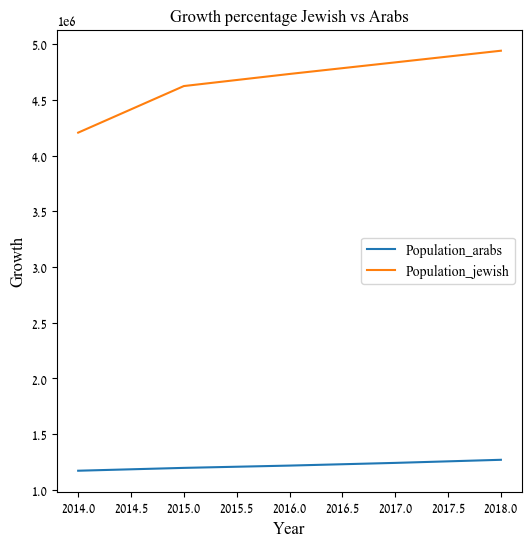

In [22]:
arabs_info = final[(final['Arabs'] >= 500) & (final['Jewish'] <= 100)]
jewish_info = final[(final['Arabs'] <= 500) & (final['Jewish'] >= 0)]
arabs_info = arabs_info.loc[:, population_cols].set_index('Name')
jewish_info = jewish_info.loc[:, population_cols].set_index('Name')
data_for_comparison = pd.DataFrame({'Year': [2014, 2015, 2016, 2017, 2018], 
                                    'Population_arabs': [arabs_info['Total Population 2014'].sum(), arabs_info['Total Population 2015'].sum(),
                                    arabs_info['Total Population 2016'].sum(), arabs_info['Total Population 2017'].sum(), 
                                                   arabs_info['Total Population 2018'].sum()] ,
                                    'Population_jewish' : [jewish_info['Total Population 2014'].sum(), jewish_info['Total Population 2015'].sum(),
                                    jewish_info['Total Population 2016'].sum(), jewish_info['Total Population 2017'].sum(), 
                                                   jewish_info['Total Population 2018'].sum()]})
data_for_comparison = data_for_comparison.set_index('Year')
data_for_comparison.pct_change()
ax = data_for_comparison.plot(figsize=(6, 6))
ax.set_title('Growth percentage Jewish vs Arabs')
ax.set_ylabel('Growth', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
plt.show()

In [23]:
data_for_comparison

,Population_arabs,Population_jewish
Year,,
2014,1171544,4205220
2015,1197045,4623249
2016,1217596,4731724
2017,1241811,4835703
2018,1269610,4940285


A pie graph showing how many settlements there are of each form:

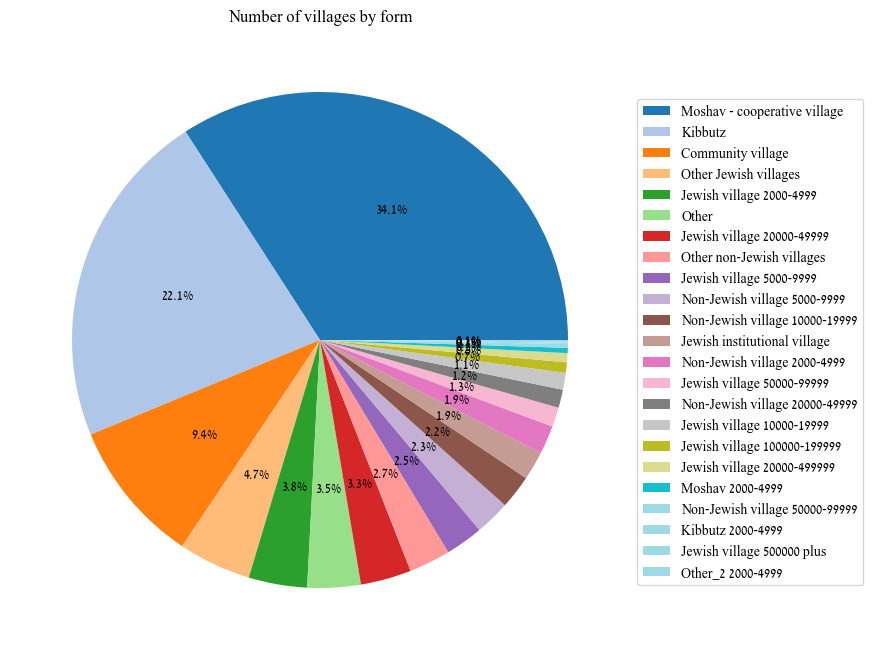

In [24]:
sizes = final['Village form'].value_counts()
forms = [get_display(form) for form in final['Village form'].value_counts().index]
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in range(len(sizes))]
fig, ax = plt.subplots(figsize=(8, 12))
ax.pie(sizes, labels=None, colors=colors, autopct='%1.1f%%')
plt.title('Number of villages by form')
plt.legend(forms, bbox_to_anchor=(1.0, 0.9))
plt.show()

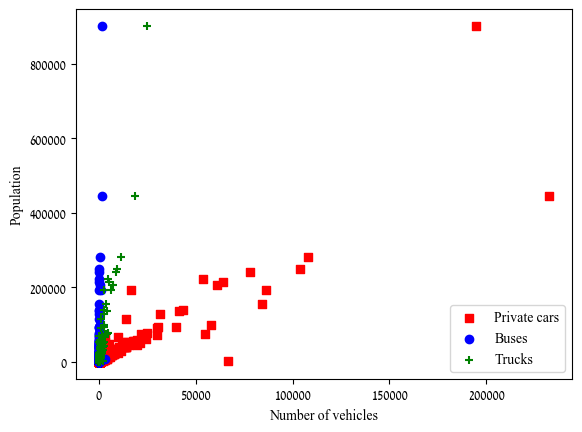

In [25]:
plt.scatter(x=final['Private vehicle'], y=final['Total Population 2017'], c='r', marker='s', label='Private cars')
plt.scatter(x=final['Buses'], y=final['Total Population 2017'], c='b', marker='o', label='Buses')
plt.scatter(x=final['Trucks'], y=final['Total Population 2017'], c='g', marker='+' ,label='Trucks')

plt.legend(numpoints=1, loc=4)
plt.xlabel('Number of vehicles')
plt.ylabel('Population')
plt.show()

<AxesSubplot:>

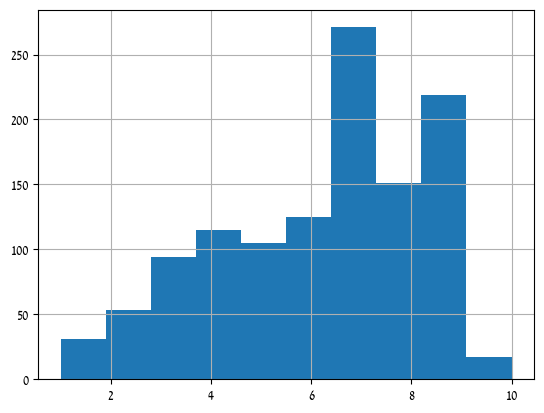

In [26]:
final['Cluster 2017'].hist()

# Machine Learning

Here we used the LinearRegression model, since we are predicting the number of population for each village/settlement.

First we one hot encoded some categorial variables into numbers so that the model could use this as feature vectors.

You can see the final result after encoding:

In [27]:
for category_column in ['Village form', 'District']:
    current = pd.get_dummies(final[category_column])
    final = pd.concat([final, current], axis=1)
    final = final.drop(columns=category_column)
    
final

,Buses,Population index 2017,Bikes,Natural area,Cluster 2017,Rank 2017,Taxi,Jewish,Jewish and other,Arabs,...,Other Jewish villages,Other non-Jewish villages,Other_2 2000-4999,Center,Haifa,Jerusalem,Judea and Sumaria,North,South,Tel Aviv
0,4.0,7248,66.0,Yehuda Mountains,3,65,12.0,64.0,84.0,7248.0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,13694,104.0,Naharia,3,63,34.0,11.0,28.0,13667.0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,1569,2.0,Beer Sheva,1,14,0.0,0.0,0.0,1569.0,...,0,1,0,0,0,0,0,0,1,0
3,3.0,2759,16.0,Haifa,2,36,12.0,1.0,1.0,2758.0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,436,6.0,Shfaram,8,708,0.0,418.0,436.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,1.0,2236,10.0,Bashur area,1,18,1.0,2232.0,2235.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1179,0.0,677,4.0,Gerar,8,751,0.0,677.0,677.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1180,0.0,3750,25.0,NaN,5,261,1.0,3711.0,3749.0,1.0,...,0,0,0,0,0,0,1,0,0,0
1181,0.0,565,0.0,Beer Sheva,1,3,0.0,6.0,6.0,559.0,...,0,1,0,0,0,0,0,0,1,0


Then we set the target column for the population in 2018 as y and X as the dataframe without the target column:

In [28]:
target_column = 'Total Population 2018'
final_for_test = final.drop(columns=['Name', 'Population index 2017', 'Total Population 2014', 'Total Population 2015',
       'Total Population 2016', 'Total Population 2017',
       'Jewish', 'Jewish and other', 'Index value', 'Difference 2014-2015', 'Bikes', 'Municipal status',
                    'Subdistrict', 'Private vehicle', 'Jewish village 10000-19999', 'Arabs',
                        'Jewish village 20000-49999', 'Jewish village 5000-9999', 'Jewish village 20000-499999', 'Jewish village 500000 plus'])
final_for_test['Natural area']= LabelEncoder().fit_transform(final_for_test['Natural area'])
#final_for_test['Subdistrict']= LabelEncoder().fit_transform(final_for_test['Subdistrict'])
columns_after_remove = final_for_test.columns[final_for_test.columns != target_column]
X = final_for_test[columns_after_remove]
y = final_for_test[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [29]:
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)
predicted_vals = LRmodel.predict(X_test)
y_pred = pd.Series(predicted_vals, index=X_test.index)
evaluate_value_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
scores = cross_val_score(LRmodel, X, y, cv=10)
print('Average score:', scores.mean())
print('Standard deviation:', scores.std())
print("MSE acore: ", mse)
print("R2 score: ", evaluate_value_r2)
print(LRmodel.coef_)
LRmodel.intercept_

Average score: 0.8752796260919364
Standard deviation: 0.138524961510038
MSE acore:  105466089.86230241
R2 score:  0.8097269893237167
[-5.35532070e+00 -6.49246623e+00  2.89253800e+02 -2.33461714e+00
  3.65718490e+01  2.00501304e+01 -6.34384160e+01  1.01053313e+00
  1.24424930e+01  6.15080409e+00 -7.38547247e+02 -2.95662072e+02
  8.16373634e+03 -7.38725459e+02 -3.90156401e+02 -6.73646540e+02
  6.64124973e+02 -1.10366110e+03 -4.58619076e+02 -7.27082721e+03
 -3.18270102e+03 -1.37952475e+04 -5.27783238e+03  1.81898940e-12
 -5.84023758e+02 -7.22494099e+02 -1.11647576e+03 -9.24348117e+02
 -1.21373151e+03 -2.70010712e+02 -8.70778768e+02 -1.12127180e+03
 -9.73249096e+02 -2.00075710e+03  6.44979899e+03]


991.1807819168262

In [30]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train.astype(float))
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())


                              OLS Regression Results                             
Dep. Variable:     Total Population 2018   R-squared:                       0.989
Model:                               OLS   Adj. R-squared:                  0.988
Method:                    Least Squares   F-statistic:                     2421.
Date:                   Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                           14:55:13   Log-Likelihood:                -9234.5
No. Observations:                    944   AIC:                         1.854e+04
Df Residuals:                        910   BIC:                         1.870e+04
Df Model:                             33                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [31]:
results = pd.DataFrame({'Test':y_test, 'Predicted values': y_pred.astype(int)})
results

,Test,Predicted values
1050,1196,1863
964,465,-353
1075,1040,2527
1088,542,-376
1016,23124,31957
...,...,...
353,4056,4554
584,262,179
1131,2547,-95
47,2256,2511


In [32]:
scores = cross_val_score(LRmodel, X, y, cv=10)
print('Average score:', scores.mean())
print('Standard deviation:', scores.std())

Average score: 0.8752796260919364
Standard deviation: 0.138524961510038


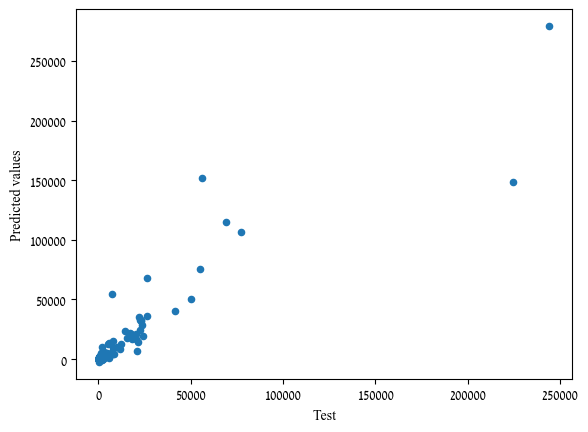

In [33]:
results.plot(kind='scatter', x='Test', y='Predicted values')
plt.show()

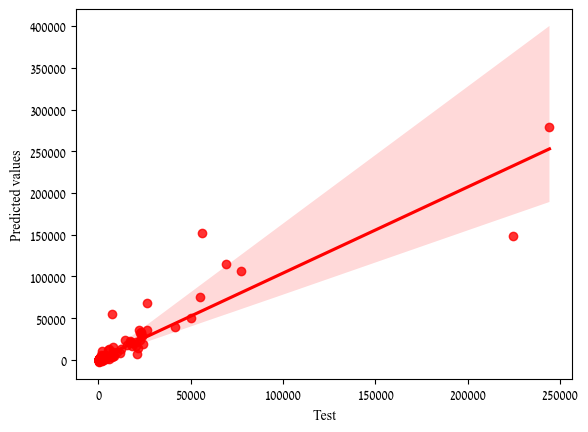

In [34]:
sns.regplot(x='Test', y='Predicted values', data=results, color='red')
plt.show()

In [35]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
scores = cross_val_score(dt, X, y, cv=10)
print('Average score:', scores.mean())
print('Standard deviation:', scores.std())
print("MSE:", mse)
print("R2:", r2)

Average score: 0.8056861443534796
Standard deviation: 0.1327577143277968
MSE: 104120094.65906794
R2: 0.8121553201740367


In [36]:
results = pd.DataFrame({'Test':y_test, 'Predicted values': y_pred.astype(int)})
results

,Test,Predicted values
1050,1196,894
964,465,894
1075,1040,894
1088,542,894
1016,23124,34211
...,...,...
353,4056,894
584,262,894
1131,2547,894
47,2256,894


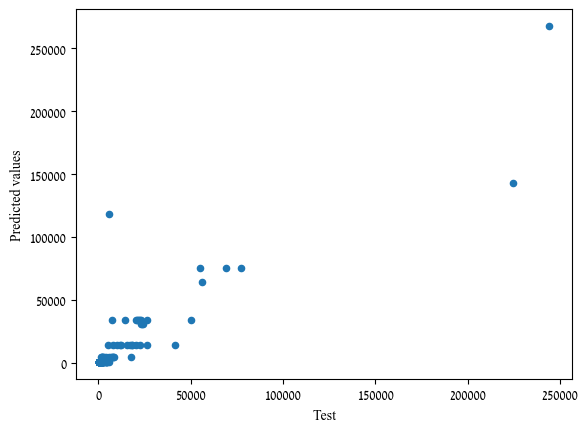

In [37]:
results.plot(kind='scatter', x='Test', y='Predicted values')
plt.show()

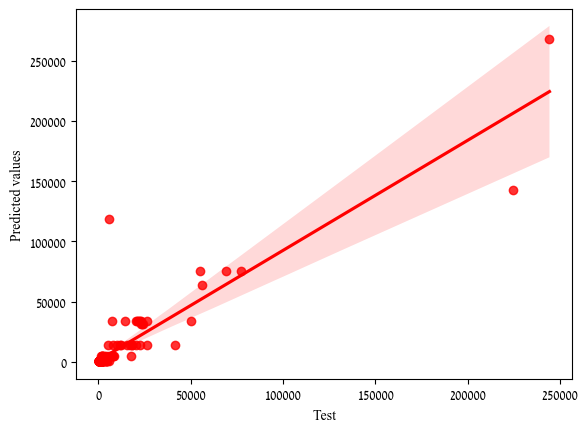

In [38]:
sns.regplot(x='Test', y='Predicted values', data=results, color='red')
plt.show()

In [39]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
scores = cross_val_score(dt, X, y, cv=10)
print('Average score:', scores.mean())
print('Standard deviation:', scores.std())
print("MSE:", mse)
print("R2:", r2)

Average score: 0.8056861443534796
Standard deviation: 0.1327577143277968
MSE: 103957984.71662447
R2: 0.8124477852388698


In [40]:
results = pd.DataFrame({'Test':y_test, 'Predicted values': y_pred.astype(int)})
results

,Test,Predicted values
1050,1196,1257
964,465,490
1075,1040,1016
1088,542,701
1016,23124,35356
...,...,...
353,4056,2649
584,262,442
1131,2547,662
47,2256,886


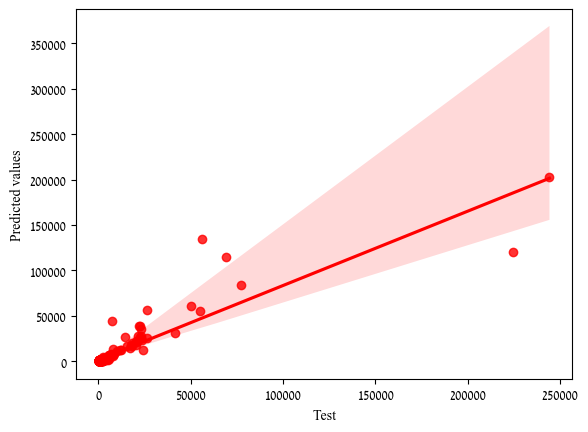

In [41]:
sns.regplot(x='Test', y='Predicted values', data=results, color='red')
plt.show()